# Телеком — Определение неэффективных операторов
В качестве заказчика выступает компания "Нупозвони" - провайдер виртуальной телефонии.

Клиентами этой компании являются кол-центры, которые:

- распределяют входящие вызовы на операторов;
- совершают исходящие вызовы силами операторов.

### Цель исследования:
На основании имеющихся данных выявить самых неэффективных операторов.

### Задачи исследования:
- Описать поведения клиентов провайдера виртуальной телефонии, а именно:
  - выяснить, как отличается средняя продолжительность звонков, средние значения по количеству звонков, а также, среднее время ожидания операторов для каждого из тарифа ;
  - построить гистограммы распределения средней продолжительности звонков для операторов каждого из тарифа;
  - построить гистограммы распределения количества исходящих и входящих звонков для каждого из тарифа;
  - определить долю пропущенных входящих вызовов для каждого оператора.
- Выявить неэффективных операторов;
- Проверить статистические гипотезы:
  - среднее время ожидания для входящих звонков у операторов на тарифе A и В - отличается;
  - среднее количество совершенных звонков у операторов на тарифах В и С - отличается.
- Подготовить презентацию;
- Сформировать дашборд.

### Исходные данные:
Таблица telecom_dataset (информация о звонках) :

- user_id — Идентификатор клиентского аккаунта в сервисе;
- date — Дата статистики;
- direction — Направление вызовов (out - исходящий вызов, in — входящий вызов);
- internal — Является ли звонок внутренним звонком между операторами клиента;
- operator_id — Идентификатор оператора;
- is_missed_call — Является ли звонок пропущенным;
- calls_count — Количество звонков;
- call_duration — Длительность звонка (без учета времени ожидания);
- total_call_duration — Длительность звонка (с учетом времени ожидания).

Таблица telecom_clients (информация о клиентах):

- user_id — Идентификатор клиентского аккаунта в сервисе;
- tariff_plan — Текущий тарифный план клиента;
- date_start — Дата регистрации клиентв в сервисе.

## Материалы
* [Презентация](https://drive.google.com/file/d/1Wz7coU3uHRtXx33CDbESteEBun7nk6AA/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/asnep_dashb_nupozvoni/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) 

##  Изучение общей информации о имеющихся данных

In [3]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#прочитаем из csv-файла данные с описанием 
path_1 = pathlib.Path('C:/') / 'Ya' / 'datas' / 'telecom_dataset.csv'
path_2 = pathlib.Path('C:/') / 'Ya' / 'datas' / 'telecom_clients.csv'
df_1 = pd.read_csv(path_1)
df_2 = pd.read_csv(path_2)
display(df_1.head()) # выводим первые 5 строк датафрейма
display(df_2.head())
display(df_1.info()) # смотрим общую информацию о данных
display(df_1.describe().T) # для наглядного изучения среднего значения, стандартного отклонения и т.д.

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

,count,mean,std,min,25%,50%,75%,max
user_id,53902.0,167295.344477,598.883775,166377.0,166782.0,167162.0,167819.0,168606.0
operator_id,45730.0,916535.993002,21254.123136,879896.0,900788.0,913938.0,937708.0,973286.0
calls_count,53902.0,16.451245,62.917170,1.0,1.0,4.0,12.0,4817.0
call_duration,53902.0,866.684427,3731.791202,0.0,0.0,38.0,572.0,144395.0
total_call_duration,53902.0,1157.133297,4403.468763,0.0,47.0,210.0,902.0,166155.0


Таблица с информацией о звонках содержит:
- 53 902 строки и 9 полей;
- отсутствующие значения в полях "internal" и "operator_id";
- информация о дате хранится в неудобном для дальнейшего исследования формате;
- в поле "is_missed_call" данные имеют булев тип данных.

Данные о пользователях:
- 732 строки и 3 столбца.

## Подготовка данных

**Оценим объем пропусков в значениях:** 

In [5]:
df_1.isna().mean()

user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.002171
operator_id            0.151608
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64

В поле "internal" менее 1% пропущенных значений - такие строки попросту удалим, а вот поле с информацией о идентификаторе оператора имеет 15% пропущенных значений - для этих значений введём  маркер "8" и заполним им пропущенные значения этого поля.

In [6]:
df_1.dropna(subset=['internal'],inplace=True) # удаляем строки с пропусками

df_1.loc[df_1['operator_id'].isna(), 'operator_id'] = 8 # заменяем пропуски на маркер
df_1.isna().mean() # проверяем корректность работы

user_id                0.0
date                   0.0
direction              0.0
internal               0.0
operator_id            0.0
is_missed_call         0.0
calls_count            0.0
call_duration          0.0
total_call_duration    0.0
dtype: float64

Теперь в данных о зваонках отсутствуют пропуски, но не стоит забывать о введёном маркере.

**Приведём поле с информацией о дате звонка в правильный формат:**

In [7]:
df_1['date'] = pd.to_datetime(df_1['date'], format='%Y-%m-%d %H:%M:%S')

Имеющиейся набор данных готов к дальнейшему исследованию

## Исследовательский анализ данных

**Объединим имеющиеся даныые**

In [8]:
data = df_1.merge(df_2, on=['user_id'], how='inner')
display(data.head())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,8.0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01


**Добавим к данным следующие поля:**
- среднюю продолжительность звонков;
- время ожидания;
- день когда был совершён звонок.

In [9]:
data['duration'] = data['total_call_duration'] / data['calls_count']
data['wait_time'] = (data['total_call_duration'] - data['call_duration']) / data['calls_count']
data['day'] = data['date'].dt.to_period('D')

**Выясним, как отличается средняя продолжительность звонков, средние значения по количеству звонков, а также, среднее время ожидания операторов для каждого из тарифа**

In [10]:
pivot1 = data.pivot_table(index = 'tariff_plan', values =['duration', 'calls_count', 'wait_time', 'total_call_duration'] )
display(pivot1)

,calls_count,duration,total_call_duration,wait_time
tariff_plan,,,,
A,32.594553,78.502624,2216.733759,17.204320
B,9.487304,94.719338,768.837865,17.386041
C,11.118485,76.675568,742.865624,16.076694


Из получившейся сводной таблицы видим:
- у операторов на тарифном плане А значения времени ожидания значительно выше остальных;
- наибольшее количество звонков приходится на операторов тарифа А;
- на тарифе В наблюдается самая высокая продолжительность звонков при самом низком количестве сделанных звонков;
- операторы на тарифном плане В имеют самое низкое время ожидания;
- что касается тарифного плана С, то его рассматриваемые параметры близки к параметрам тарифа В.

**Визуализируем распределение параметров для каждого из имеющихся тарифов**

In [11]:
def get_hist(tariff_name_1, tariff_name_2, tariff_name_3, service, title_1, title_2, title_3, x_label):
    """ Эта функция для созданя гистограмм.
    
    На вход она принимает: название рассматриваемых тарифов, показатель по которому строим распределение,
    названия заголовков и подпись по оси Х
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.hist(data.loc[data['tariff_plan'] == tariff_name_1, service], range(0, 100))
    ax1.set_title(title_1)
    ax1.set_xlabel(x_label)

    ax2.hist(data.loc[data['tariff_plan'] == tariff_name_2, service], range(0, 100))
    ax2.set_title(title_2)
    ax2.set_xlabel(x_label)
    
    ax3.hist(data.loc[data['tariff_plan'] == tariff_name_3, service], range(0, 100))
    ax3.set_title(title_3)
    ax3.set_xlabel(x_label)
    plt.show()
    pass

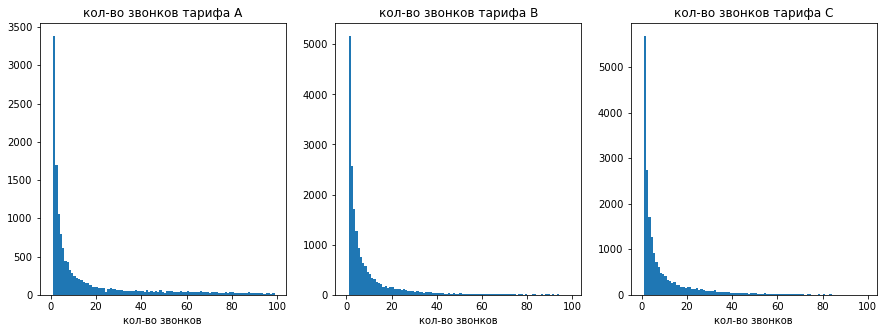

In [12]:
get_hist('A', 'B', 'C', 'calls_count'
         , 'кол-во звонков тарифа А'
         , 'кол-во звонков тарифа B'
         , 'кол-во звонков тарифа C'
         , 'кол-во звонков')

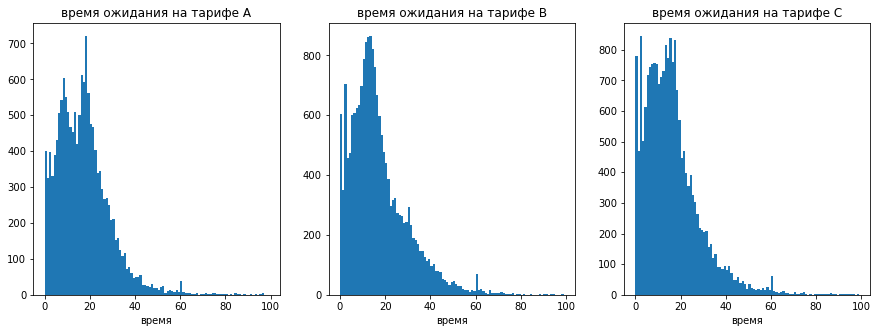

In [13]:
get_hist('A', 'B', 'C', 'wait_time'
         , 'время ожидания на тарифе А'
         , 'время ожидания на тарифе B'
         , 'время ожидания на тарифе C'
         , 'время')

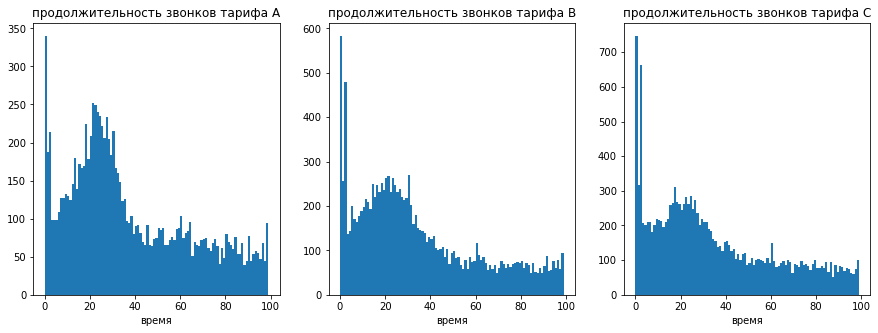

In [14]:
get_hist('A', 'B', 'C', 'duration'
         , 'продолжительность звонков тарифа А'
         , 'продолжительность звонков тарифа B'
         , 'продолжительность звонков тарифа C'
         , 'время')

На предствленной визуализации видим, что распределения рассматриваемых параметров у тарифов А, В и С происходит очень похоже.
Вероятно, сводная таблица по средним значениям дала искаженные результаты из-зы выбросов.

Убедимся в этом, для этого построим сводную таблицу с медианными значениями

In [15]:
pivot2 = data.pivot_table(index = 'tariff_plan'
                          , values =['duration', 'calls_count', 'wait_time', 'total_call_duration']
                          , aggfunc = 'median')
display(pivot2)

,calls_count,duration,total_call_duration,wait_time
tariff_plan,,,,
A,5,49.101010,360,16.000000
B,3,45.675439,187,14.230769
C,3,41.500000,169,14.000000


- Время ожидания на тарифном плане А действительно больше чем у остальных, но не в 5 раз - как может показаться рассматривая данные по средним значениям;
- Также видим, что продолжительность разговора по медианному значению на тарифном плане А, оказалась выше чем у остальных.

**Посмотрим, как распределено количество исходящих и входящих звонков на каждом из тарифов**

In [16]:
data.pivot_table(index=['direction','tariff_plan'], values='calls_count')

calls_count
direction tariff_plan             
in        A              19.319352
          B               7.692063
          C               6.475155
out       A              39.578202
          B              10.680285
          C              15.067505

Судя по полученной таблице, операторы каждого из рассматриваемых тарифов, в большей степени, специализируются на исходящих звонках.

**Посмотрим на распределение пропущенных входящих звонков у операторов каждого из тарифа**

Для этого построим диаграммы размаха, они же ящики с усами

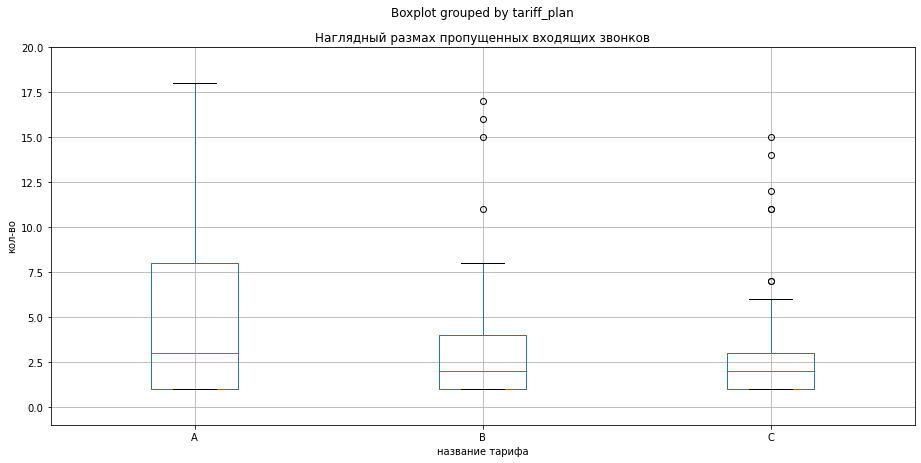

In [17]:
# получаем сраз данных с пропущенными входящими звонками,
# затем задаём параметры для оформления диаграмм размаха
(
    data.query('direction=="in" and is_missed_call==True ')
    .pivot_table(index =['tariff_plan','operator_id'], values='calls_count', aggfunc='sum')
    .reset_index()
    .boxplot(column='calls_count', by='tariff_plan', figsize=(15,7))
)
plt.ylim(-1, 20)
plt.title('Наглядный размах пропущенных входящих звонков')
plt.ylabel('кол-во')
plt.xlabel('название тарифа')
plt.show()

Видим следующее:
- наибольшее кол-во пропущенных входящих звонков наблюдается у операторов на тарифе А, а наименьшее - на тарифе С;
- как правило, количество пропущенных входящих звонков не превышает 8 штук (75% процентиль на ящике тарифа А);
- *для дальнейшего анализа примем тот факт, что больше 8 пропущенных входящих звонков для оператора - это признак низкой эффективности работы.*

**Выясним как распределено время ожидания ответа при входящих внешних вызовах**

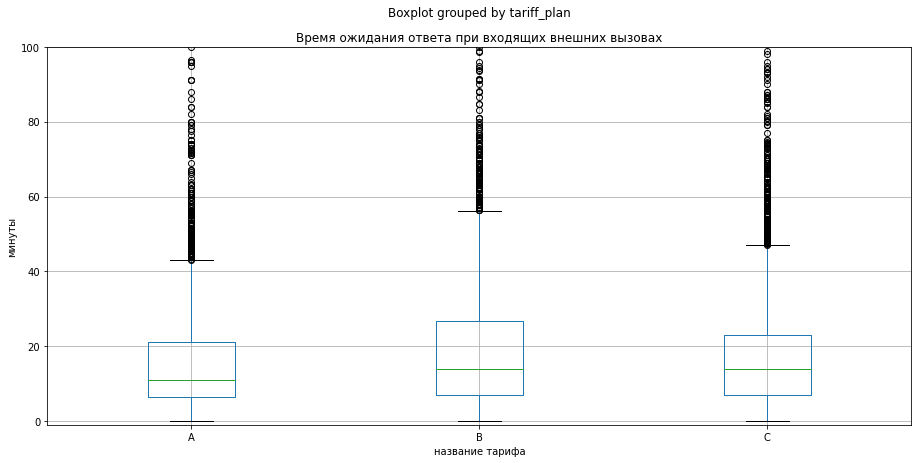

In [18]:
# задаём срез данных с входящими вызовами и вывовами которые не являются внутренними
data.query('direction=="in" and internal==False ').boxplot(column='wait_time', by='tariff_plan',  figsize=(15,7))
plt.ylim(-1, 100)
plt.title('Время ожидания ответа при входящих внешних вызовах')
plt.ylabel('минуты')
plt.xlabel('название тарифа')
plt.show()

~~Удивило - но, судя по данным, ждать ответа оператора 2 часа - это норма.~~ 

27 минут - это нормальное время ожидания ответа оператора.

**Определим те колл-центры, которые специализируются только на исходящих звонках**

In [19]:
display(data.groupby('direction').agg({'user_id':'nunique'}))
print('Общее количество колл-центров:',data['user_id'].nunique())

,user_id
direction,
in,307
out,222


Общее количество колл-центров: 307


Получается, что все рассматриваемые клиенты работают с входящими звонками, а 222 из них работают и с входящими и с исходящими. В данных нет таких клиентов которые работают исключительно с исходящими звонками, поэтому будем рассматривать 50 колл-центров с наибольшим количеством исходящих звонков.

In [20]:
# так создаём список пользователей которые преимущественно специализируются на исходящих звонках
out_users = (
    data.pivot_table(index=['user_id', 'direction']
                     , values='calls_count'
                     , aggfunc='sum')
                     .reset_index()
                     .query('direction=="out"')
                     .sort_values(by='calls_count', ascending=False)
                     .head(50)
)
out_users = out_users['user_id'].tolist()

В дальнейшем исследовании, для определения неэффективных операторов по одному из признаков, будем использовать срез данных в котором будут отображаться операторы тех колл-центров которые попали в список "out_users"

## Выявление неэффективных операторов
**Признак 1: много пропущенных входящих вызовов**

Ранее было определено, что больше 8 пропущенных вызовов у оператора - это много. Создадим список таких операторов.

In [21]:
# список назовем bed_empl_1 (от англ. bad employee по первому признаку)
bed_empl_1 = (
    data.query('direction=="in" and is_missed_call==True')
    .pivot_table(index='operator_id', values='calls_count', aggfunc='sum')
    .reset_index()
)

#bed_empl_1
bed_empl_1 = bed_empl_1.query('calls_count > 8')
bed_empl_1 = bed_empl_1['operator_id']
bed_empl_1.count()

30

Теперь мы имеем список из 30 операторов (в т.ч. те, чьи имена имели отсутствующие значения) которые чаще 8 раз пропускали входящий вызов

**Признак 2: долгое ожидания ответа при входящих внешних вызовах**

Как мы помним из нашего EDA, которое мы провели ранее, нормальное время ожидания ответа оператора при внешних вызовах получилось - ~~120 минут~~. 27 минут

Вновь составим список нерадивых операторов, но уже таких которые заставляют ждать ответа более ~~120 минут.~~ 27 минут

In [22]:
bed_empl_2 = (
    data.query('direction=="in" and internal==False ')
    .pivot_table(index='operator_id', values='wait_time')
    .reset_index()
)

bed_empl_2 = bed_empl_2.query('wait_time > 27')
bed_empl_2 = bed_empl_2['operator_id']
bed_empl_2.count()

128

Вторая партия неэффективных операторов готова. При входящих внешних вызовах, они заставляют ждать более 27 минут.

**Признак 3: мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков**

Для решения этой задачи мы имеем список интересующих нас колл-центров: out_users 

Поработаем с данными которые относятся к клиентам из этого списка


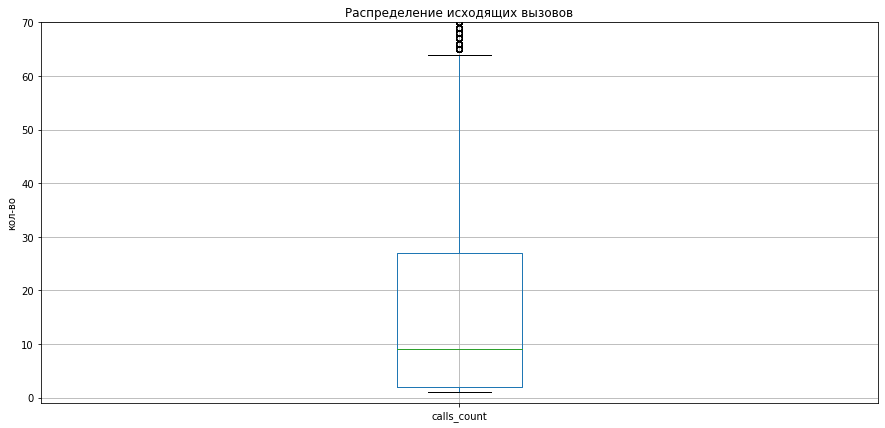

In [23]:
df_for_out = data.query('user_id in @out_users')
df_for_out.query('direction=="out"').boxplot(column='calls_count',  figsize=(15,7))
plt.ylim(-1, 70)
plt.title('Распределение исходящих вызовов')
plt.ylabel('кол-во')
plt.show()

Исходя из диаграммы размаха можно заключить, что у рассматриваемых колл-центров, в основном, операторы совершают до 65 исходящих звонков.

В дальнейшем будем принимать, что мало исходящих звонков для операторов из рассматриваемых колл-ценров - это меньше 10.

Составим список из неэффективных операторов по третьему признаку

In [24]:
bed_empl_3 = (
    df_for_out.query('direction=="out"')
    .pivot_table(index='operator_id', values='calls_count')
    .reset_index()
)

bed_empl_3 = bed_empl_3.query('calls_count < 10')
bed_empl_3 = bed_empl_3['operator_id']
bed_empl_3.count()

235

Обнаружили 235 неэффективных операторов, которые совершают меньше 10 исходящих вызовов, работая при этом в колл-центре, который специализируется на обзвонах.

**Составим набор данных в котором отобразим только неэффективных операторов**

In [25]:
# получаем срез из нашего набора данных в который попадают только неэффективные операторы из составленных ранее списков
bad_data = data.query('operator_id in @bed_empl_1 or operator_id in @bed_empl_2 or operator_id in @bed_empl_3')

# посмотрим на общее количество неэффективных операторов
print('кол-во неэффективных операторов по всем трём признакам:', bad_data['operator_id'].nunique())

кол-во неэффективных операторов по всем трём признакам: 351


Таким образом, мы располагаем информацией о низкоэффективных операторах, с которой поработаем в следующем пункте

- из полученного ранее набора данных с НЕО "bad_data", создадим таблицу с клиентами и количеством НЕО;
- из исходного набора данных "data" получим таблицу с клиетами и количеством всех операторов;
- соединим эти две таблицы по "user_id";
- создадим дополнительное поле, в нём считаем какой процент от всех операторов у клиента является неэффективным;
- сортируем таблицу по кол-ву операторов и проценту НЕО. Для того чтобы определить клиентов с наибольшим количеством операторов (думаю, что такие клиенты в приоритете), среди которых большой процент НЕО.

In [26]:

user_with_be = (bad_data.pivot_table(index='user_id', values=['operator_id'], aggfunc='count')
                        .sort_values(by='operator_id', ascending=False)
                        .reset_index()
                        
               )
user_with_be.columns = ['user_id', 'count_be'] 
#display(user_with_be) # тут таблица с клиентами и количеством НЕО

all_users = (data.pivot_table(index='user_id', values=['operator_id'], aggfunc='count')
                        .sort_values(by='operator_id', ascending=False)
                        .reset_index()
            )
all_users.columns = ['user_id', 'count_all_operators']
#display(all_users) # тут таблица с клиетами и количеством всех операторов

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

user_with_be = user_with_be.merge(all_users, on = 'user_id')
user_with_be['bed_employee_per'] = user_with_be['count_be'] / user_with_be['count_all_operators'] * 100
user_with_be = user_with_be.sort_values(by=['count_all_operators','bed_employee_per' ], ascending = False)
user_with_be.head()

,user_id,count_be,count_all_operators,bed_employee_per
1,168187,1438,2580,55.736434
0,166658,2104,2105,99.952494
2,167497,1399,1405,99.572954
3,166916,1305,1305,100.000000
35,167626,129,1298,9.938367


## Выявление особенностей операторов с низкой эффективностью
**Посмотрим в каком соотношении они располагаются на тарифных планах**

In [27]:
bad_data.groupby('tariff_plan').agg({'operator_id':'nunique'})

,operator_id
tariff_plan,
A,133
B,125
C,95


Нельзя сказать, что они сильно неравномерно разбиты по тарифным планам.

**Изучим у каких пользователей наибольшее количество операторов с низкой эффективностью**

Плсмотрим на общее распределение кол-ва операторов среди клиентов, чтобы определить таких, которые выделяются большим количеством операторов, но при этом большинство из операторов имеют низкую эффективность.

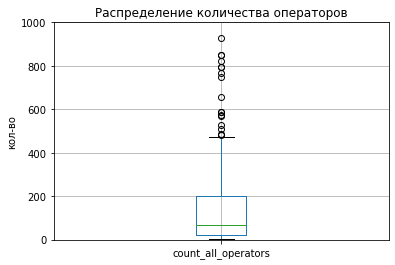

In [28]:
user_with_be.boxplot(column = 'count_all_operators')
plt.ylim(-1, 1000)
plt.title('Распределение количества операторов')
plt.ylabel('кол-во')
plt.show()

Уделим особое внимание клиентам которые имеют 400 и больше операторов

- Получим срез из таблицы "user_with_be" в котором отобразим тех клиентов, которым нужно уделить особое внимание: у них 400 и более операторов, больше половина из которых НЕО;
- Создадим **список важных клиентов с большим количеством НЭО**

In [29]:
# список важных клиентов с большим количеством НЭО:
top_user_with_be = user_with_be.query('count_all_operators >= 400 and bed_employee_per > 50')
print('Кол-во крупных клиентов с максимальным процентом НЕО:',top_user_with_be['user_id'].count())
top_user_with_be = top_user_with_be['user_id'].tolist()
print()
print('ID этих клиентвов:', top_user_with_be)

Кол-во крупных клиентов с максимальным процентом НЕО: 21

ID этих клиентвов: [168187, 166658, 167497, 166916, 167150, 166405, 166983, 168252, 167109, 166782, 166582, 166485, 167359, 167650, 167977, 168091, 166407, 166997, 167521, 166541, 167888]


**Посмотрим как менялась активность низкоэффективных операторов (НЭО) на разных тарифах во времени**

Text(0, 0.5, 'количество звонков')

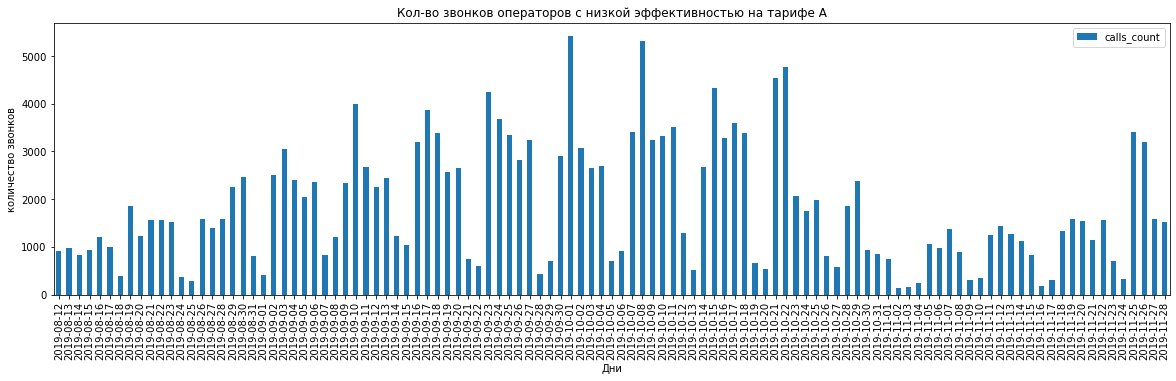

In [30]:
(
    bad_data.query('user_id in @top_user_with_be and tariff_plan=="A" ')
    .pivot_table(index='day', values=['calls_count'], aggfunc='sum')
    .sort_values(by='day')
    .plot(kind='bar', linewidth=2, figsize=(20, 5))
)
plt.title('Кол-во звонков операторов с низкой эффективностью на тарифе А')
plt.xlabel('Дни')
plt.ylabel('количество звонков')

Видим, что на тарифе А , активность НЭО с 30 октября снизилась практически втрое

Text(0, 0.5, 'количество звонков')

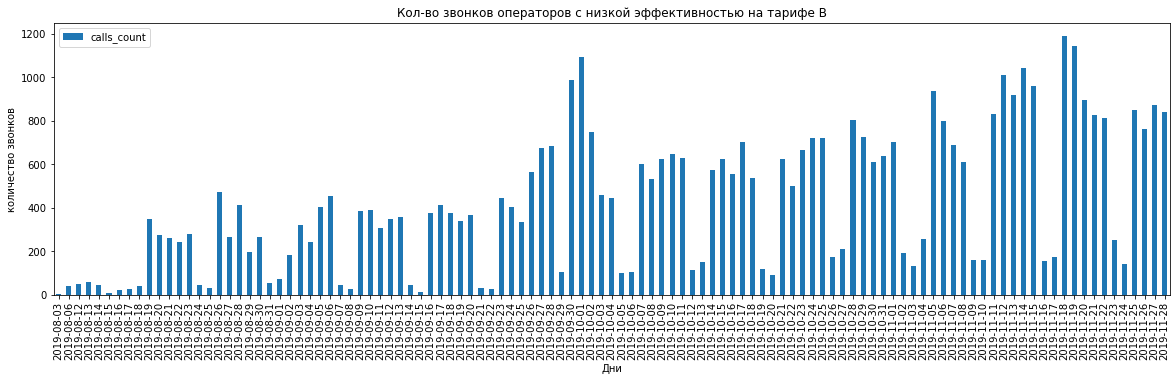

In [31]:
(
    bad_data.query('user_id in @top_user_with_be and tariff_plan=="B" ')
    .pivot_table(index='day', values=['calls_count'], aggfunc='sum')
    .sort_values(by='day')
    .plot(kind='bar', linewidth=2, figsize=(20, 5))
)
plt.title('Кол-во звонков операторов с низкой эффективностью на тарифе B')
plt.xlabel('Дни')
plt.ylabel('количество звонков')

На тарифе В у НЭО никаких резких изменений активности во времени не наблюдается

Text(0, 0.5, 'количество звонков')

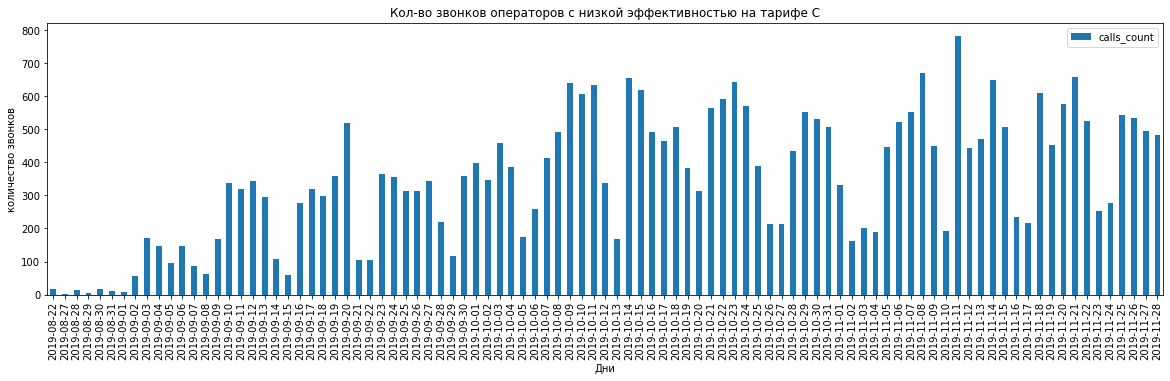

In [32]:
(
    bad_data.query('user_id in @top_user_with_be and tariff_plan=="C" ')
    .pivot_table(index='day', values=['calls_count'], aggfunc='sum')
    .sort_values(by='day')
    .plot(kind='bar', linewidth=2, figsize=(20, 5))
)
plt.title('Кол-во звонков операторов с низкой эффективностью на тарифе C')
plt.xlabel('Дни')
plt.ylabel('количество звонков')

НЭО на тарифе С не снизили свою активность за рассматриваемые три месяца

## Проверка статистических гипотез
### Проверка 1

**Нулевая гипотеза - Н0_1:** Среднее время ожидания для входящих звонков у операторов на тарифе A и В - равны.

**Альтернативная гипотеза - Н1_1:** Среднее время ожидания для входящих звонков у операторов на тарифе A отличается от тарифа В

In [33]:
from scipy import stats as st
sample1 = data.loc[data['tariff_plan'] == 'A', 'wait_time']
sample2 = data.loc[data['tariff_plan'] == 'B', 'wait_time']
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 0.24065270285012014
Не получилось отвергнуть нулевую гипотезу


**Принимаем гипотезу Н0_1:** Среднее время ожидания для входящих звонков у операторов на тарифе А **не отличется** от среднего времени ожидания для входящих звонков у операторов на тарифе В.

### Проверка 2

**Нулевая гипотеза - Н0_2:** Среднее количество совершённых звонков у операторов на тарифе В и С - равны

**Альтернативная гипотеза - Н1_2:** Среднее количество совершенных звонков у операторов на тарифе В отличается от тарифа С

In [34]:
sample1 = data.loc[data['tariff_plan'] == 'B', 'calls_count']
sample2 = data.loc[data['tariff_plan'] == 'C', 'calls_count']
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 1.805457427161211e-05
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу и принимаем альтернативную - Н1_2:** 

Среднее количество совершённых звонков у операторов на тарифе B отличется от среднего количества совершённых звонков у операторов на тарифе С.

## Общий вывод

- В результате проведенного анализа, удалось составить три списка с ID низкоэффективных операторов:
  - bed_empl_1 - 30 операторов из этого списка имеют большое количество пропущенных входящих вызовов;
  - bed_empl_2 - для этих 128 операторов характерно долгое ожидания ответа при входящих внешних вызовах;
  - bed_empl_3 - это те 235 операторов, которые преимущественно специализируются на обзвонах, однако, имеют довольно мало исходящих вызовов.

- Составлен набор данных с названием "bad_data" в котором отображены все 351 неэффективных операторов с исходными параметрами.

- Вероятно, на тарифе А , начиная с ноября 2019 года были внесены какие-либо существенные изменения, так как начиная с этого периода активность операторов на тарифе А сократилась втрое.



